# Airbnb
When traveling to a destination, one of the first things a person thinks about is lodging. Depending on the location, hotel prices can be fairly expensive, even if a person is only staying overnight. Various websites are devoted to finding the best price for a hotel (trivago, hotels.com, kayak, etc.).

Airbnb is different. Airbnb is an online marketplace for arranging or offering lodging. The company does not own any of the real estate listings or host any events; it is just the broker, and receives a commission from each booking. The company was conceived after the founders put an air mattress in their living room, turning their apartment into a bed and breakfast in order to offset the high rent cost in San Francisco.

Since its inception, guests and hosts have used Airbnb to expand on traveling possibilities, presenting a more unique, personalized way of experiencing the world. The idea that someone could offer up an extra room to make some extra cash is very appealing to many people, especially in places where the cost of living is high, such as New York City.

# How it Works

Airbnb is a platform for hosts to accommodate guests with short-term lodging and tourism-related activities. You can search using various filters, such as lodging type, location and price. Users must provide payment information before booking and have the ability to chat with the hosts. Hosts provide various information such as prices, event listings, rules, and amenities. Pricing is determined by the host, though Airbnb does recommend prices.

Advantages compared to hotels:
* Can be anywhere in the city
* Wide array of different options to choose from
* Might be cheaper than a hotel

Disadvantages compared to hotels:
* May not be available when you want, hotels typically have many rooms available at any given time
* Subject to user feedback only, no strength in the "brand"
* No set rates, hosts charge what they feel like charging

Hotels typically have a set rate per night (depending on the time of year). In January 2020, hotel rooms in New York City look to go between 100 and 125 dollars per night, based on a quick Google search of the area. This got me thinking, do Airbnb users pay more or less than that per night on average?

In [5]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from scipy import stats

#Importing the data and taking a look at it
airbnb = pd.read_csv("AirBNB_NYC_2019.csv")
airbnb.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


# Location

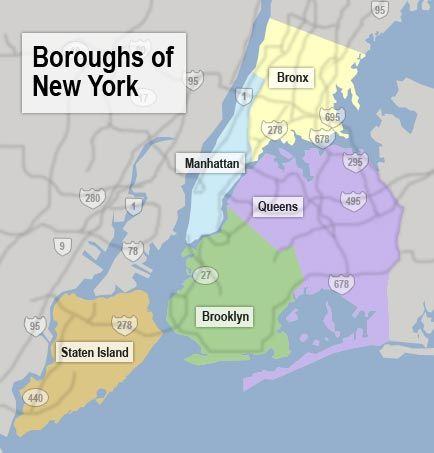

New York City is often referred to collectively as the five boroughs:

* **Manhattan** - the smallest and most densely populated borough. It is the symbol of New York City, home to many skyscrapers and landmarks (like Times Square and Central Park). Often described as the cultural, financial, media and entertainment capital of the world.
* **Brooklyn** - the most populous borough. It is known for its cultural, social, and ethic diversity. Brooklyn has evolved into a thriving hub of entrepreneurship and high technology startup firms.
* **Queens** - the geographically largest borough. It is the most ethnically diverse urban area in the world. Queens is the site of Citi Field where the New York Mets play. In addition to this, John F. Kennedy International Airport and LaGuardia Airport are located in this borough.
* **The Bronx** - the only borough that is part of the United States mainland. Home to the largest cooperatively owned housing complex in the United States, it is also the location of Yankee Stadium. In addition to this, the world's largest metropolitan zoo, the Bronx Zoo is located here as well as the New York Botanical Garden and Pelham Bay Park (the largest park in New York City)
* **Staten Island** - the most suburban in character of the five boroughs. Connected to Brooklyn by the Verrazzano-Narrows Bridge and Manhattan via the Staten Island Ferry. Home to the Staten Island Greenbelt, one of the last undisturbed forests in the city.

No matter where you are staying in New York City, there is always something to do!

In [3]:
#What neighborhoods are in the data?
neighbourhood_count = airbnb.neighbourhood_group.value_counts()
print(neighbourhood_count)

Manhattan        21661
Brooklyn         20104
Queens            5666
Bronx             1091
Staten Island      373
Name: neighbourhood_group, dtype: int64


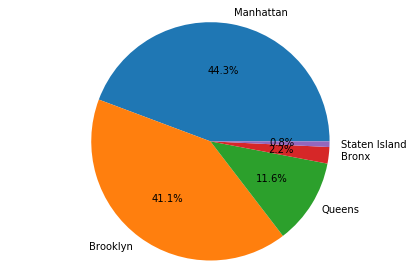

In [45]:
#Visualization of the above data
labels = ["Manhattan", "Brooklyn", "Queens", "Bronx", "Staten Island"]
plt.pie(neighbourhood_count, labels = labels, autopct='%1.1f%%')

plt.axis('equal')

plt.tight_layout()
plt.show()

The vast majority of listings on Airbnb are in Manhattan and Brooklyn, making up 85.4% of the total rooms. This makes sense since Manhattan is densly populated and Brooklyn has a large population in general.

In [46]:
#What types of rooms are available?
room_type_count = airbnb.room_type.value_counts()
print(room_type_count)

Entire home/apt    25409
Private room       22326
Shared room         1160
Name: room_type, dtype: int64


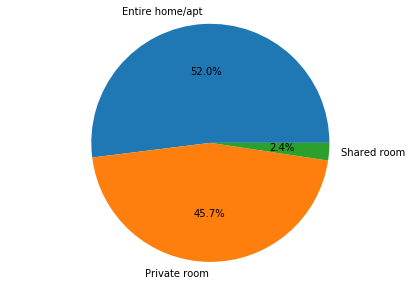

In [47]:
#Visualization
labels = ["Entire home/apt", "Private room", "Shared room"]
plt.pie(room_type_count, labels = labels, autopct='%1.1f%%')

plt.axis('equal')

plt.tight_layout()
plt.show()

Airbnb offers a wide variety of spaces, all grouped into the following room types:

* **Entire home/apt** - You get the entire dwelling to yourself, usually including a bedroom, bathroom, kitchen, and a  dedicated entrance. The best option if you are seeking a "home away from home". Probably the best option if you are staying in a location for a few days.
* **Private room** - You get a private room in the apartment/home for sleeping and might share some spaces with others (either the host or other guests). Good for if you want a little privacy, but value a local connection.
* **Shared room** - You are sleeping in a space shared with others and share the entire space with other people. Popular among flexible travelers looking for budget-friendly stays or someone looking for new friends.

For New York City, entire apartment/home makes up (52%) of the available rooms, followed closely by private rooms (45.7%). Very few hosts are offering shared rooms. This surprises me. I didn't expect so many hosts to offer the entire apartment/home to the guest. I figured that people would be using airbnb to help offset the higher cost of living in the city by bringing in some extra money each month by renting out spare rooms in their place.

# Pricing
Since people are offering either their entire home or just a room, I wonder if that changes what they are charging per night. If a person is offering the entire dwelling, are they charging more than someone just offering up a spare room?

In [6]:
#How expensive are airbnb prices in NYC?
airbnb.price.describe()

count    48895.000000
mean       152.720687
std        240.154170
min          0.000000
25%         69.000000
50%        106.000000
75%        175.000000
max      10000.000000
Name: price, dtype: float64

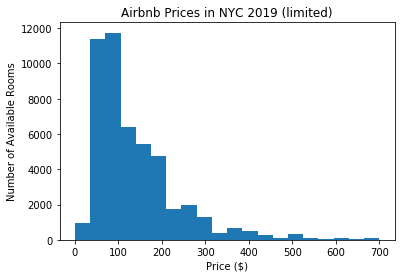

In [64]:
#A visualization of the data, with prices greater than $700 a night removed (explained below)
prices = airbnb.drop(airbnb[airbnb.price > 700].index)
plt.hist(prices.price, bins= 20)
plt.title("Airbnb Prices in NYC 2019 (limited)")
plt.xlabel("Price ($)")
plt.ylabel("Number of Available Rooms")
plt.show()

Looking at the histogram above, it is clear that this data is skewed to the right (mean is larger than the median). Because of this, I will be using the median to help describe where the center of this dataset is, since the median is more resistant to large outliers. For this dataset, the median price for an Airbnb room in NYC in 2019 is $106 per night, which appears to be on par with what hotels are charging.

It is worth mentioning that the histogram used to visualize the data does not include the full data because I wanted the histogram to at least be useable to some degree. If I include the full data, the histogram won't be useful at all. For comparision, this the histogram for the full dataset:

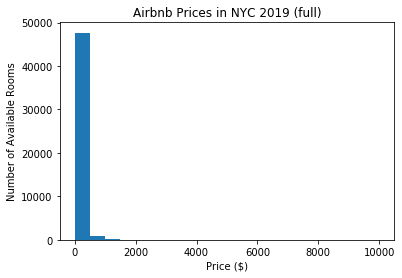

In [65]:
plt.hist(airbnb.price, bins= 20)
plt.title("Airbnb Prices in NYC 2019 (full)")
plt.xlabel("Price ($)")
plt.ylabel("Number of Available Rooms")
plt.show()

As you can see, this histogram is pretty much useless because of the large outliers in this dataset. But these outliers are still useful because they aren't data entry errors, they are actual prices that hosts are charging! To help determine how prices change, I will be breaking up the data based on neighbourhood group as well as room type.

In [49]:
#Create new datasets for each neighbourhood group (ex. Brooklyn, Manhattan, etc.)
manhattan = airbnb[airbnb["neighbourhood_group"] == "Manhattan"]
brooklyn = airbnb[airbnb["neighbourhood_group"] == "Brooklyn"]
queens = airbnb[airbnb["neighbourhood_group"] == "Queens"]
bronx = airbnb[airbnb["neighbourhood_group"] == "Bronx"]
staten_island = airbnb[airbnb["neighbourhood_group"] == "Staten Island"]

print("Manhattan:")
print(manhattan.price.describe())
print()
print("Brooklyn:")
print(brooklyn.price.describe())
print()
print("Queens:")
print(queens.price.describe())
print()
print("Bronx:")
print(bronx.price.describe())
print()
print("Staten Island:")
print(staten_island.price.describe())

Manhattan:
count    21661.000000
mean       196.875814
std        291.383183
min          0.000000
25%         95.000000
50%        150.000000
75%        220.000000
max      10000.000000
Name: price, dtype: float64

Brooklyn:
count    20104.000000
mean       124.383207
std        186.873538
min          0.000000
25%         60.000000
50%         90.000000
75%        150.000000
max      10000.000000
Name: price, dtype: float64

Queens:
count     5666.000000
mean        99.517649
std        167.102155
min         10.000000
25%         50.000000
50%         75.000000
75%        110.000000
max      10000.000000
Name: price, dtype: float64

Bronx:
count    1091.000000
mean       87.496792
std       106.709349
min         0.000000
25%        45.000000
50%        65.000000
75%        99.000000
max      2500.000000
Name: price, dtype: float64

Staten Island:
count     373.000000
mean      114.812332
std       277.620403
min        13.000000
25%        50.000000
50%        75.000000
75%       1

Ranking for neighbourhoods (most to least expensive), using the median:  Manhattan (150) > Brooklyn (90) > Queens (75) = Staten Island (75) > Bronx (65)

The majority of the listings are in Manhattan and Brooklyn, so it makes sense that there is more variation in the prices. With all of the stuff to do in New York City, Manhattan would be the first choice for a person to stay, since it would be close to a lot of places. But, if you're willing to spend a bit more time getting to your location, you can save a bit of money by just staying in Brooklyn.

In [58]:
#Breakdown by room type
room_types = airbnb[["neighbourhood_group", "room_type", "price"]]

room_types.groupby(["neighbourhood_group", "room_type"]).describe()

price                                \
                                       count        mean         std   min   
neighbourhood_group room_type                                                
Bronx               Entire home/apt    379.0  127.506596   95.027102  28.0   
                    Private room       652.0   66.788344  107.009071   0.0   
                    Shared room         60.0   59.800000  101.798871  20.0   
Brooklyn            Entire home/apt   9559.0  178.327545  226.415825   0.0   
                    Private room     10132.0   76.500099  124.713499   0.0   
                    Shared room        413.0   50.527845   53.444485   0.0   
Manhattan           Entire home/apt  13199.0  249.239109  331.830132   0.0   
                    Private room      7982.0  116.776622  190.191318  10.0   
                    Shared room        480.0   88.977083   92.416534  10.0   
Queens              Entire home/apt   2096.0  147.050573  129.383208  10.0   
                    Private room      3372.0   71.762456  180.506756  10.0   
                    Shared room        198.0   69.020202  171.000607  11.0   
Staten Island       Entire home/apt    176.0  173.846591  394.600216  48.0   
                    Private room       188.0   62.292553   36.138245  20.0   
                    Shared room          9.0   57.444444   45.119594  13.0   

                                                                    
                                       25%    50%     75%      max  
neighbourhood_group room_type                                       
Bronx               Entire home/apt   80.0  100.0  140.00   1000.0  
                    Private room      40.0   53.5   70.00   2500.0  
                    Shared room       28.0   40.0   55.50    800.0  
Brooklyn            Entire home/apt  105.0  145.0  199.00  10000.0  
                    Private room      50.0   65.0   80.00   7500.0  
                    Shared room       30.0   36.0   50.00    725.0  
Manhattan           Entire home/apt  142.5  191.0  259.00  10000.0  
                    Private room      68.0   90.0  120.00   9999.0  
                    Shared room       49.0   69.0   89.25   1000.0  
Queens              Entire home/apt   90.0  120.0  168.25   2600.0  
                    Private room      47.0   60.0   75.00  10000.0  
                    Shared room       30.0   37.0   54.25   1800.0  
Staten Island       Entire home/apt   75.0  100.0  151.25   5000.0  
                    Private room      40.0   50.0   75.00    300.0  
                    Shared room       29.0   30.0   75.00    150.0

The above table is a breakdown of each available room type in each neighbourhood group. I thought this would be interesting to look at to see how much hosts were charging depending on the type of room they were offering. In particular, I was interested in seeing how much more (or less) it would cost, on average, for the entire home/apt vs. just a private room.

Above I mentioned that Manhattan would be the place to be when it comes to first choices to staying in New York City. The best deal for a Manhattan airbnb room is to get a shared room, which would run you around 69. If you're willing to spend a bit more, you can get a private room for 90.

If you're willing to travel a bit further, you can get a good deal in Brooklyn with 65 for a private room and 36 for a shared room.

# Conclusion
Airbnb is changing up the lodging industry. No longer are you restricted to just staying in a hotel, you can create your own unique experience using this service, wherever you are in the world.